In [1]:
import MySQLdb
import datetime
import json
import pandas as pd
import math
import urllib.request 
from IPython.display import Image
import numpy as np

In [2]:
Earth_radius = 6378137
Gmap_tile_size = 256
Gmap_scale = 2
Dpi = 96
Inch_meter = 39.37
Img_px_x = 640
Img_px_y = 640



In [3]:
def gmaps_request(c_lat, c_lng, zoom=18):
    earth_circ = Earth_radius * 2* math.pi
    k = earth_circ / Gmap_tile_size
    mt_pixel = k * math.cos(c_lat*math.pi/180)/(2**zoom) / Gmap_scale
    img_x = Img_px_x * Gmap_scale
    img_y = Img_px_y * Gmap_scale

    scale = mt_pixel * Inch_meter * Dpi
    deg_px_lat = mt_pixel / earth_circ * 360
    deg_px_lng = mt_pixel / (earth_circ * math.cos(c_lat*math.pi/180) ) * 360
    d_lat = img_x / 2 * deg_px_lat
    d_lng = img_y / 2 * deg_px_lng
    n_lat = c_lat + d_lat
    s_lat = c_lat - d_lat
    w_lng = c_lng - d_lng
    e_lng = c_lng + d_lng
    gmap_size = "%sx%s"%(Img_px_x, Img_px_y)
    return "https://maps.googleapis.com/maps/api/staticmap?center=%s,%s&zoom=%s&scale=%s&size=%s&maptype=satellite"%(c_lat,c_lng,zoom, Gmap_scale, gmap_size) 

In [4]:
with open('./credentials.json') as f:
    data = json.load(f)
    username = data['username']
    password = data['password']
    
db = MySQLdb.connect(host="localhost", user=username, passwd=password, db="bbxais_development" )

query1 = "select * from s57objs where f_class IN ('BRIDGE', 'BOYLAT', 'SMCFAC', 'LIGHTS', 'WRECK')"

data = pd.read_sql(query1, con=db)
data.head()

,id,f_class,latitude,longitude,chart_name,tags,created_at,updated_at,lnam
0,4,BRIDGE,37.9431,-122.515,US5CA21M,"{""CATBRG"": ""1"", ""SORDAT"": ""19990316"", ""SORIND""...",2017-12-17 00:00:25,2017-12-17 00:00:25,0226166286990DC8
1,5,BRIDGE,37.9345,-122.435,US5CA21M,"{""CATBRG"": ""1"", ""OBJNAM"": ""Richmond - San Rafa...",2017-12-17 00:00:25,2017-12-17 00:00:25,02261662868E0DC8
2,6,BRIDGE,37.8827,-122.519,US5CA21M,"{""CATBRG"": ""1"", ""SCAMIN"": 59999, ""SORIND"": ""US...",2017-12-17 00:00:25,2017-12-17 00:00:25,02260000756A0001
3,7,BRIDGE,37.9394,-122.464,US5CA21M,"{""CATBRG"": ""1"", ""OBJNAM"": ""Richmond - San Rafa...",2017-12-17 00:00:25,2017-12-17 00:00:25,02261662868C0DC8
4,8,BRIDGE,37.9090,-122.329,US5CA21M,"{""CATBRG"": ""1"", ""SCAMIN"": 59999, ""SORDAT"": ""19...",2017-12-17 00:00:25,2017-12-17 00:00:25,0226166286AB0DC8


In [5]:
size=len(data)
print(size)

59716


In [6]:
sample = data.loc[ np.random.randint(size, size = 40), ['id', 'f_class','latitude','longitude']]
sample

,id,f_class,latitude,longitude
51139,132200,LIGHTS,46.9642,-123.8530
173,326,BRIDGE,46.4262,-123.8920
39761,100265,LIGHTS,27.6404,-97.2365
20940,50984,BRIDGE,41.9467,-87.6961
8029,18650,BOYLAT,40.7874,-72.7251
33271,80958,BRIDGE,27.7474,-82.7377
20644,50198,SMCFAC,42.1109,-86.4708
45583,115211,BRIDGE,32.2304,-80.7910
13239,30189,LIGHTS,40.9262,-72.4497
55756,147121,LIGHTS,21.3583,-157.9720


In [7]:
for index, row in sample.iterrows():
    obj_id, klass, latitude, longitude = row.id, row.f_class, row.latitude, row.longitude
    print(klass, latitude, longitude)
    file_name = 'images/'+klass+'_'+str(obj_id)+'.png'
    url = gmaps_request(latitude, longitude)
    print(file_name, url)
    urllib.request.urlretrieve(url, file_name)
    Image(filename=file_name)
    

LIGHTS 46.9642 -123.853
images/LIGHTS_132200.png https://maps.googleapis.com/maps/api/staticmap?center=46.9642,-123.853&zoom=18&scale=2&size=640x640&maptype=satellite
BRIDGE 46.4262 -123.892
images/BRIDGE_326.png https://maps.googleapis.com/maps/api/staticmap?center=46.4262,-123.892&zoom=18&scale=2&size=640x640&maptype=satellite
LIGHTS 27.6404 -97.2365
images/LIGHTS_100265.png https://maps.googleapis.com/maps/api/staticmap?center=27.6404,-97.2365&zoom=18&scale=2&size=640x640&maptype=satellite
BRIDGE 41.9467 -87.6961
images/BRIDGE_50984.png https://maps.googleapis.com/maps/api/staticmap?center=41.9467,-87.6961&zoom=18&scale=2&size=640x640&maptype=satellite
BOYLAT 40.7874 -72.7251
images/BOYLAT_18650.png https://maps.googleapis.com/maps/api/staticmap?center=40.7874,-72.7251&zoom=18&scale=2&size=640x640&maptype=satellite
BRIDGE 27.7474 -82.7377
images/BRIDGE_80958.png https://maps.googleapis.com/maps/api/staticmap?center=27.7474,-82.7377&zoom=18&scale=2&size=640x640&maptype=satellite
SMCF

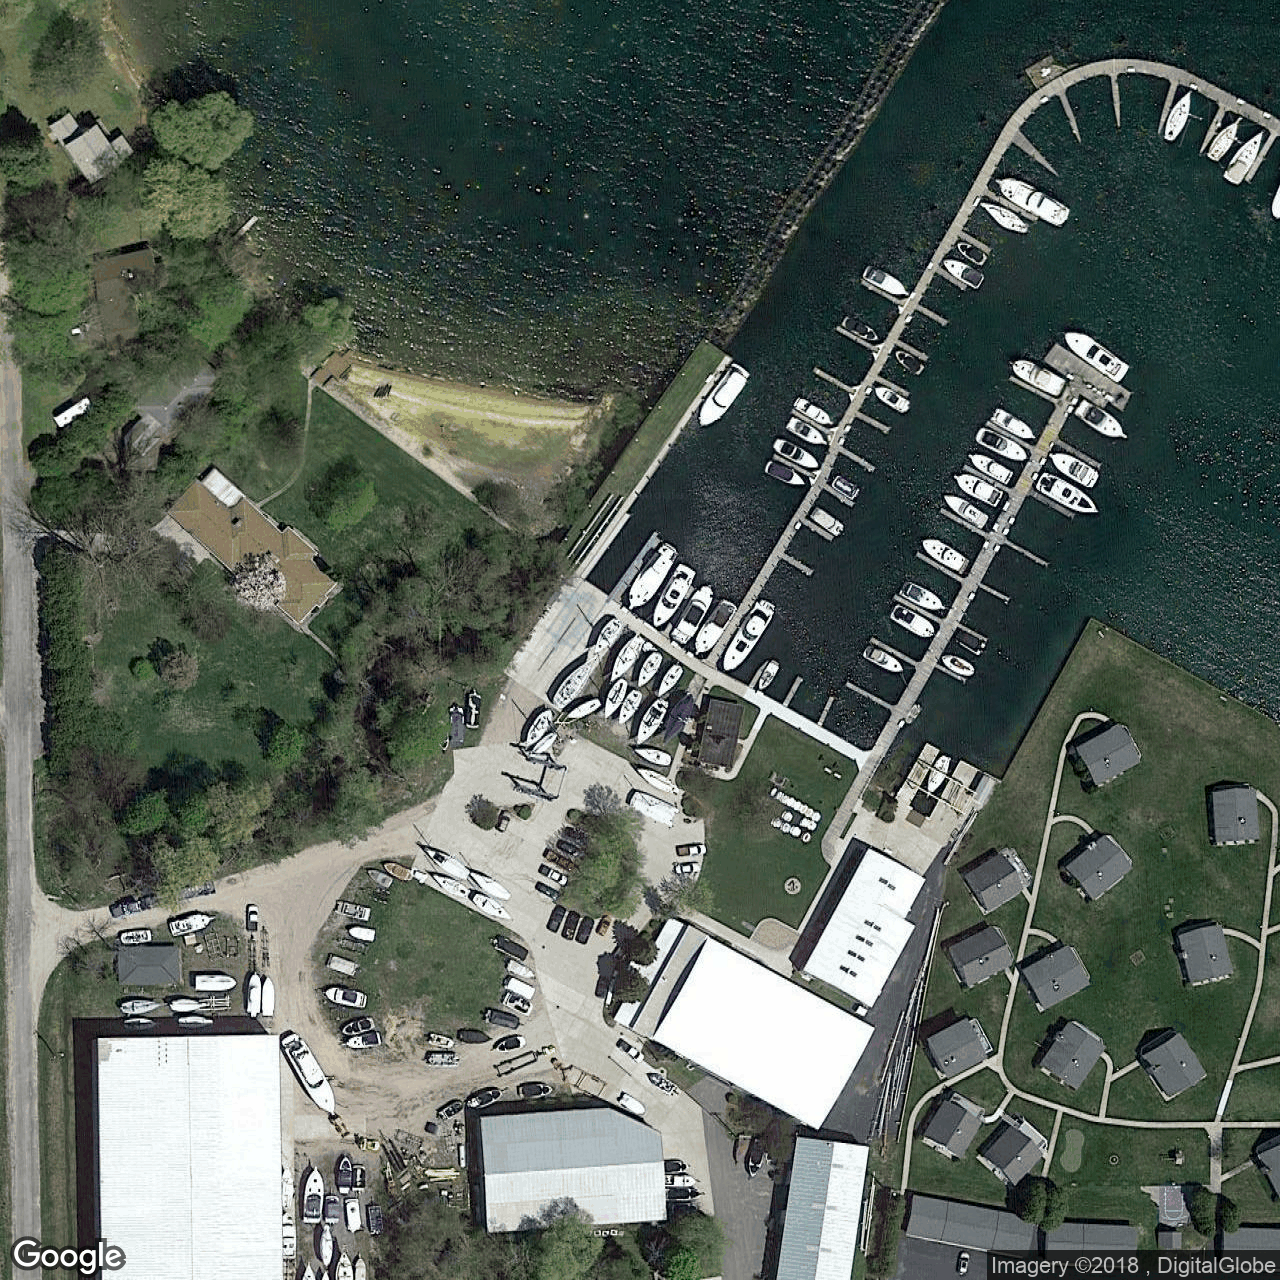

In [8]:
Image(filename=file_name)
 